In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import os
import sys
import pickle
from glob import glob

sys.path.append('../../benchmarks_known/')

from gryffin.benchmark_functions import (
    CatDejong, 
    CatMichalewicz,
    CatCamel,
)

sns.set(style='ticks', context='notebook', font_scale=1.2)

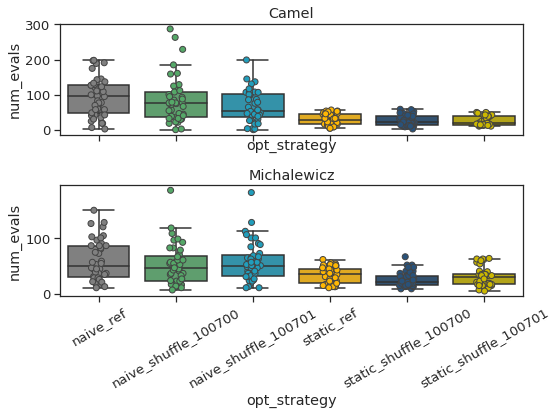

In [12]:
def plot_eval_comparison(folder, ax):  
    
    num_evals_all = []
    opt_strategies = []

    # NAIVE
    with open(f'{folder}/opt_naive_ref/results.pkl', 'rb') as content:
        data_naive_ref = pickle.load(content)
        
    with open(f'{folder}/opt_naive_shuffle_100700/results.pkl', 'rb') as content:
        data_naive_shuffle_100700 = pickle.load(content)
        
    with open(f'{folder}/opt_naive_shuffle_100701/results.pkl', 'rb') as content:
        data_naive_shuffle_100701 = pickle.load(content)
        
    # STATIC
    with open(f'{folder}/opt_static_ref/results.pkl', 'rb') as content:
        data_static_ref = pickle.load(content)
        
    with open(f'{folder}/opt_static_shuffle_100700/results.pkl', 'rb') as content:
        data_static_shuffle_100700 = pickle.load(content)
        
    with open(f'{folder}/opt_static_shuffle_100701/results.pkl', 'rb') as content:
        data_static_shuffle_100701 = pickle.load(content)
    
        

    num_evals = np.array([len(df) for df in data_naive_ref])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['naive_ref'] * len(num_evals))
    
    num_evals = np.array([len(df) for df in data_naive_shuffle_100700])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['naive_shuffle_100700'] * len(num_evals))
    
    num_evals = np.array([len(df) for df in data_naive_shuffle_100701])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['naive_shuffle_100701'] * len(num_evals))
    
    
    num_evals = np.array([len(df) for df in data_static_ref])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['static_ref'] * len(num_evals))
    
    num_evals = np.array([len(df) for df in data_static_shuffle_100700])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['static_shuffle_100700'] * len(num_evals))
    
    num_evals = np.array([len(df) for df in data_static_shuffle_100701])
    num_evals_all.extend(num_evals)
    opt_strategies.extend(['static_shuffle_100701'] * len(num_evals))
    
    

    # create dataframe
    df = pd.DataFrame({'num_evals':num_evals_all, 'opt_strategy':opt_strategies})  

    # plot
    b_ = sns.boxplot(ax=ax, data=df, x="opt_strategy", y="num_evals", showfliers=False, 
                    palette=['gray', 'g', '#219ebc', '#ffb703', '#29527a', '#ccb800', '#ff8c42', '#508ca4', '#004f2d', '#ccb800'])
    s_ = sns.stripplot(ax=ax, data=df, x="opt_strategy", y="num_evals", 
                      palette=['gray', 'g', '#219ebc', '#ffb703','#29527a','#ccb800', '#ff8c42', '#508ca4', '#004f2d', '#ccb800'], 
                      edgecolor='#444444', linewidth=1, size=6)
   # b_.set_xticklabels(rotation=30)
    return df
    

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True)

df_camel  = plot_eval_comparison('../../benchmarks_known/shuffle/cat-camel', ax=axes[0])
df_michalewicz = plot_eval_comparison('../../benchmarks_known/shuffle/cat-michalewicz', ax=axes[1])


axes[0].set_title('Camel')
axes[1].set_title('Michalewicz')


plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig('categorical-shuffle-benchmarks.png', dpi=300)